## Понижение размерности

**Понижение размерности (dimensionality reduction)** — задача, в которой мы пытаемся уменьшить количество признаков, характеризующих объект. Обычно мы уменьшаем количество признаков до 2-3 для того, чтобы получить возможность визуализировать данные.

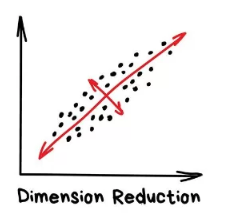

**Практическая польза**:
* объединение нескольких признаков в один и получение абстракции. Например, собаки с треугольными ушами, длинными носами и большими хвостами объединяются в полезную абстракцию «овчарки». Да, мы теряем информацию о конкретных овчарках, но новая абстракция точно полезнее этих лишних деталей;
* увеличение скорости обучения;
* избавление от мультиколлинеарности признаков. Методы понижения размерности устроены так, что в первую очередь объединяют между собой наиболее коррелированные признаки;

**Цель обучения** — построить модель, которая переводит пространство признаков из размерности $n$ в размерность $m (m<n)$, при этом сохранив наибольший объём информации. Математически это записывается как $a: X^n \to X^m$.

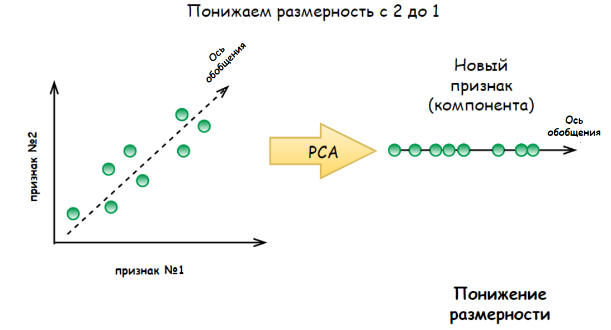

Основные алгоритмы понижения размерности:
* метод главных компонент (PCA);
* сингулярное разложение (SVD);
* латентное размещение Дирихле (LDA);
* латентный семантический анализ (LSA);
* t-SNE.

Методы снижения размерности могут преобразовывать данные двумя способами:
* линейно,
* нелинейно.

### PCA

**Метод главных компонент, или PCA (Principal Components Analysis)** — это один из базовых способов уменьшения размерности.

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

Первой главной компонентой будет называться первая ось в новом пространстве.

Например, если у нас есть данные о полученных студентами баллах на экзаменах по двух предметам, мы можем визуализировать эти данные в 2D-пространстве, где по оси x будут баллы по одному предмету, а по оси y — по второму.

Далее мы вводим две новые оси, которые являются линейными комбинациями предыдущих. Ось PC1 проходит через максимальную дисперсию данных и является суммой исходных осей, а ось PC2 является разницей двух исходных осей, перпендикулярна первой оси и тоже проходит через максимальную оставшуюся дисперсию

Таким образом, мы получили первую главную компоненту и вторую компоненту. При этом первая компонента несёт в себе максимум информации о данных, а в каждой последующей компоненте информации всё меньше.

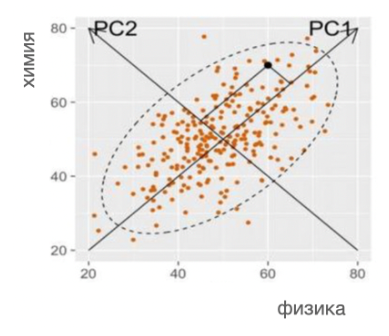

In [1]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [3]:
print(f'Было признаков: {len(train_x[0])}')
print(f'Стало признаков: {len(train_x_pca[0])}')

Было признаков: 784
Стало признаков: 300


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. \n Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. \n Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

Модель, построенная на признаках, полученных после уменьшения размерности. 
 Время обучения 196.57874059677124, метрика модели 0.925
Модель, построенная на всех исходных признаках. 
 Время обучения 460.4656295776367, метрика модели 0.9187142857142857


В данном случае мы потратили на обучение модели В два раза меньше времени, а качество осталось практически таким же

### T-SNE

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет **t-SNE (t-distributed Stochastic Neighbor Embedding)**, что переводится с английского как «стохастическое вложение соседей с t-распределением». 

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

**Алгоритм**:
1. В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов:

    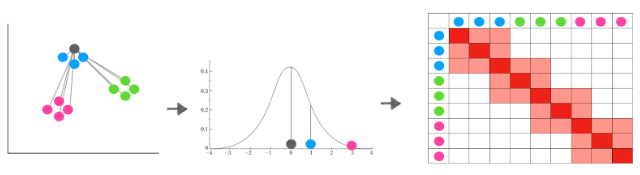

2. На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось x. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а t-распределение. После этого строим матрицу попарной схожести объектов:

    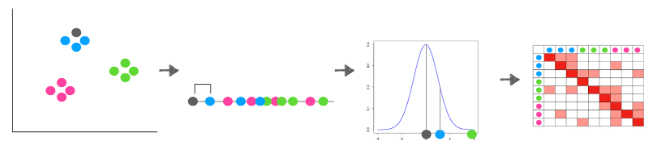

3. Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:

    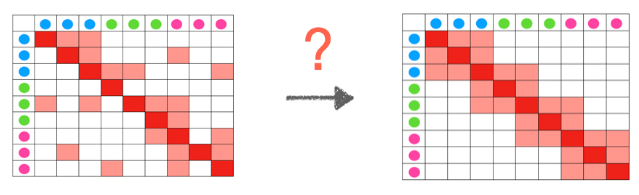

    С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдалённых:

    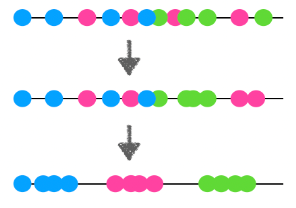

**TSNE**:
* **n_components** — размерность нового пространства.
* **perplexity** — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
* **n_iter** — количество итераций для оптимизации.
* **random_state** — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

In [5]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
tsne.fit_transform(X)

c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  8.205584  ,   0.61250937],
       [ 13.96876   ,   4.857875  ],
       [-17.374657  ,   6.6908913 ],
       ...,
       [-17.623663  ,  -4.6533074 ],
       [  2.6945565 ,   4.4431024 ],
       [  9.611309  ,   9.498205  ]], dtype=float32)

### Сравнение техник понижения размерности:

 - | PCA | T-SNE
 --|--|--
Преобразование, которое используется для снижения размерности	| Линейное	| Нелинейное
Кейсы использования	| Уменьшение размерности данных с целью их дальнейшего использования в ML-моделях	| Визуализация многомерного пространства
Вызов в sklearn	| from sklearn.decomposition import PCA | from sklearn.manifold import TSNE

Уменьшим размерность с помощью PCA:

In [ ]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

Уменьшим размерность с помощью t-SNE:

In [ ]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

Как видим, алгоритм t-SNE отлично справляется с уменьшением размерности для визуализации, а вот при использовании PCA данные не разделились на кластеры и пересекаются друг с другом — такую визуализацию будет неудобно анализировать.